In [96]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('C:/Users/innal/OneDrive/Desktop/Data Analytics Course/ML course/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df = df.drop(columns=['ocean_proximity'])

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [11]:
df['population'].median()

1166.0

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

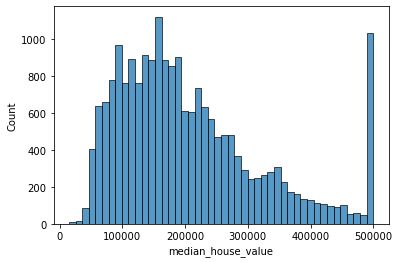

In [13]:
sns.histplot(df.median_house_value)

In [29]:
n = len(df)

In [31]:
ind = np.arange(n)
ind

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [36]:
np.random.seed(42)
np.random.shuffle(ind)

In [37]:
val=int(len(df)*0.2)
test=int(len(df)*0.2)
train=len(df)-val-test
train,val,test

(12384, 4128, 4128)

In [38]:
df_train = df.iloc[ind[:train]]
df_val = df.iloc[ind[train:train+val]]
df_test = df.iloc[ind[train+val:]]
len(df_train),len(df_val),len(df_test)

(12384, 4128, 4128)

In [66]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
6339,-117.89,33.98,5.0,3088.0,711.0,1415.0,641.0,2.5125
4737,-118.38,34.05,52.0,1241.0,210.0,526.0,214.0,4.4191
17654,-121.89,37.25,21.0,2080.0,352.0,1040.0,325.0,5.2887
388,-122.30,37.90,38.0,2263.0,522.0,1027.0,509.0,3.5125
2589,-124.10,40.88,35.0,2987.0,578.0,1581.0,585.0,2.0657


In [42]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [45]:
y_val,y_test

(array([12.09066741, 11.96718709, 12.26670197, ..., 12.14047223,
        12.50692141, 12.49650468]),
 array([12.39172615, 11.45318608, 11.4700284 , ..., 12.58485491,
        12.00089793, 10.92235292]))

In [46]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [47]:
df_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3640,-118.44,34.22,39.0,1529.0,344.0,913.0,314.0,3.3250
19634,-120.89,37.52,42.0,1200.0,221.0,647.0,192.0,2.5402
11201,-117.92,33.83,17.0,382.0,86.0,272.0,81.0,1.4250
10822,-117.91,33.65,24.0,1494.0,494.0,814.0,459.0,2.1074
12088,-117.26,33.86,16.0,1171.0,235.0,659.0,216.0,3.1103


In [78]:
m = df_train['total_bedrooms'].mean()
m

538.6335373317013

In [64]:
def train_lin_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [65]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [67]:
df_train1 = df_train.copy()
df_train2 = df_train.copy()

In [68]:
# with 0

X_train1 = df_train1.fillna(0).values
w0, w = train_lin_reg(X_train1, y_train)
y_pred = w0 + X_train1.dot(w)

In [69]:
w0, y_pred

(-11.75456798777099,
 array([11.88367417, 12.35478533, 12.44848889, ..., 12.21605365,
        12.14672363, 12.39168824]))

<AxesSubplot:ylabel='Count'>

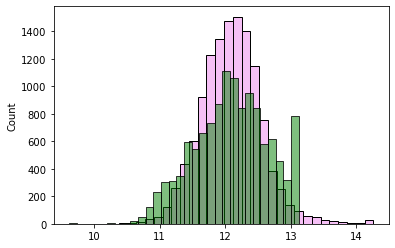

In [71]:
sns.histplot(y_pred, color='violet', alpha=0.5, bins=30)
sns.histplot(y_train, color='green', alpha=0.5, bins=30)

In [73]:
round(rmse(y_train, y_pred),2)

0.34

In [77]:
y_pred = w0 + df_val.dot(w)
round(rmse(y_val, y_pred),2)

0.34

In [79]:
# with mean

X_train2 = df_train1.fillna(m).values
w0, w = train_lin_reg(X_train2, y_train)
y_pred = w0 + X_train2.dot(w)

In [80]:
w0, y_pred

(-11.843075892011486,
 array([11.88106457, 12.35088277, 12.44887682, ..., 12.21423582,
        12.14167521, 12.38815699]))

In [82]:
round(rmse(y_train, y_pred),2)

0.34

In [83]:
y_pred = w0 + df_val.dot(w)
round(rmse(y_val, y_pred),2)

0.34

In [84]:
df_train3 = df_train.copy()

In [86]:
X_train3 = df_train3.fillna(0).values

In [85]:
# Regularization

def train_lin_reg_R(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [88]:
for r in [0, 0.000001, 0.01, 0.1]:
    w0_3, w_3 = train_lin_reg_R(X_train3, y_train, r=r)

    X_val_3 =df_val.fillna(0).values
    y_pred_3 = w0_3 + X_val_3.dot(w_3)
    score = rmse(y_val, y_pred_3)
    
    print(r, w0_3, score)

0 -11.75456798777099 0.3382745717854273
1e-06 -11.754551899190785 0.3382745703371478
0.01 -11.595855599916032 0.33826258887483207
0.1 -10.33937484015322 0.33832987722875635


In [94]:
rmse_scores =[]

In [98]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    np.random.seed(s)
    np.random.shuffle(ind)
    df_train = df.iloc[ind[:train]]
    df_val = df.iloc[ind[train:train+val]]
    df_test = df.iloc[ind[train+val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    df_train = df_train.fillna(0).values
    df_val = df_val.fillna(0).values
    
    w0, w = train_lin_reg(df_train, y_train)
    
    y_pred = w0 + df_val.dot(w)
    
    score = round(np.sqrt(mean_squared_error(y_val, y_pred)),2)
    rmse_scores.append(score)

In [100]:
std = round(np.std(rmse_scores),3)

In [101]:
std

0.005

In [124]:
np.random.seed(9)
np.random.shuffle(ind)
df_train = df.iloc[ind[:train]]
df_val = df.iloc[ind[train:train+val]]
df_test = df.iloc[ind[train+val:]]
    
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [125]:
len(df_train)

12384

In [126]:
df_full_train = pd.concat([df_train, df_val])

In [127]:
df_full_train = df_full_train.fillna(0).values

In [128]:
y_full_train = np.concatenate([y_train, y_val])

array([12.30546992, 12.65076167, 11.90564975, ..., 11.89478753,
       12.37624149, 12.62872585])

In [129]:
w0, w = train_lin_reg_R(df_full_train, y_full_train, r=0.001)

In [130]:
y_pred = w0 + df_test.dot(w)
result = rmse(y_test, y_pred)
round(result,2)

0.16